(politics)=
# Kritik und Politik

:::{admonition} **Lernziele**
- Energieeffizienzmaßnahmen kritisch bewerten
- mithilfe verschiedener Perspektiven
- um die Sinnhaftigkeit zu hinterfragen
:::

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import collections.abc
from collections.abc import Iterable
import sklearn
from sklearn import linear_model
import shutil

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('seaborn', sns.__version__)
print('collections.abc',collections.abc)
print(sklearn, sklearn.__version__)
print('shutil', shutil)

Versionen der verwendeten python-Module: 
numpy 2.1.1
matplotlib 3.9.2
seaborn 0.13.2
collections.abc <module 'collections.abc' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/collections/abc.py'>
<module 'sklearn' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/site-packages/sklearn/__init__.py'> 1.5.2
shutil <module 'shutil' from '/home/franzi/.pyenv/versions/miniconda3-latest/lib/python3.12/shutil.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
if shutil.which('latex'): plt.rcParams['text.usetex'] = True

### Funktionen definieren

In [3]:
class AxTransformer:
    def __init__(self, datetime_vals=False):
        self.datetime_vals = datetime_vals
        self.lr = linear_model.LinearRegression()
        
        return
    
    def process_tick_vals(self, tick_vals):
        if not isinstance(tick_vals, Iterable) or isinstance(tick_vals, str):
            tick_vals = [tick_vals]
            
        if self.datetime_vals == True:
            tick_vals = pd.to_datetime(tick_vals).astype(int).values
            
        tick_vals = np.array(tick_vals)
            
        return tick_vals
    
    def fit(self, ax, axis='x'):
        axis = getattr(ax, f'get_{axis}axis')()
        
        tick_locs = axis.get_ticklocs()
        tick_vals = self.process_tick_vals([label._text for label in axis.get_ticklabels()])
        
        self.lr.fit(tick_vals.reshape(-1, 1), tick_locs)
        
        return
    
    def transform(self, tick_vals):        
        tick_vals = self.process_tick_vals(tick_vals)
        tick_locs = self.lr.predict(np.array(tick_vals).reshape(-1, 1))
        
        return tick_locs
    
def set_date_ticks(ax, start_date, end_date, axis='y', date_format='%Y-%m-%d', **date_range_kwargs):
    dt_rng = pd.date_range(start_date, end_date, **date_range_kwargs)

    ax_transformer = AxTransformer(datetime_vals=True)
    ax_transformer.fit(ax, axis=axis)
    
    getattr(ax, f'set_{axis}ticks')(ax_transformer.transform(dt_rng))
    getattr(ax, f'set_{axis}ticklabels')(dt_rng.strftime(date_format))

    ax.tick_params(axis=axis, which='both', bottom=True, top=False, labelbottom=True)
    
    return ax

## Lokale Optimierungen vs. globale Optimierungen

:::{admonition} **AUFGABE**
Welche lokalen Optimierungen fallen Ihnen ein, die sich zwar für Einzelne wirtschaftlich oder ökologisch rechnen, die aber gesamtgesellschaftlich oder für unseren Planeten negativ zu bewerten sind?
:::

*Antwort:...*

:::{figure-md} unschuldig
<img src="../img/unschuldige-deutsche.png" width="70%">

Lokale Optimierung auf Nationenebene
:::

Einen Faktencheck zum CO$_2$-Ausstoß bezogen auf verschiedene Länder finden Sie in {cite:p}`nina_breher_nein_2019`.

Ein einseitiger Fokus auf Energieeffizienz lässt außen vor, dass für unseren Planeten auch der Ressourcenverbrauch problematisch ist. Ebenfalls sind lokale Optimierungen, die dann an anderer Stelle höhere Energiebedarfe verursachen, nicht im Sinne der Klimafreundlichkeit.

Dies effektiv zu adressieren ist häufig Sache der (Unternehmens-)Politik.

## Allzu menschlich: Moralisches Lizensieren und Vogel-Strauß-Taktik

{cite:p}`judith_braun_wie_2021` zeigt auf, dass Menschen dazu tendieren, gute Taten aufzurechnen, z. B.: _Wenn ich Wasser spare, darf ich Strom verschwenden_ {cite:p}`tiefenbeck_for_2013` - diejenigen Nutzer, die wöchentlich über ihren Wasserverbrauch informiert wurden, sparten 6,0% ein - und erhöhten ihren Stromverbrauch um 5,6%.

{cite:p}`webb_ostrich_2013` weist darauf hin, dass Menschen ungerne ein negatives Selbstbild von sich haben. Das führt dazu, dass sie z. B. Energieverbrauch nicht messen (oder seltener), um gar nicht erst herauszufinden, falls sie sich nicht so sinnvoll verhalten. Die Veröffentlichung weist aber auch darauf hin, dass Menschen, die regelmäßig bestimmte Parameter kontrollieren (z. B. regelmäßig Quizfragen für eine Lehrveranstaltung beantworten), dann auch mehr dafür tun, Missstände zu beheben. Es ist also wichtig, motivierende Wege zu finden, Informationen über den Energieverbrauch aufzuzeigen, so dass Menschen dranbleiben.

## Rebound-Effekt

:::{figure-md} jevons
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Jevons.jpeg" width="30%">

William Stanley Jevons [The original uploader was Radeksz at English Wikipedia., Public domain, via Wikimedia Commons, [Link](https://commons.wikimedia.org/wiki/File:Jevons.jpeg)]
:::

Durch die Einführung der Wattschen Dampfmaschine 1865 (dreimal effizienter als Vorgängermaschine) deutlicher Anstieg des britischen Kohleverbrauchs, es wurden dreimal so viele Maschinen eingesetzt! {cite:p}`martin_pehnt_energieeffizienz_2010`

**Direkter Rebound**: effizienter angebotene Dienstleistung wird billiger und dadurch stärker nachgefragt

**Indirekter Rebound**: erhöhte Nachfrage nach anderen Gütern

**Backfire**: wenn durch Effizienz Energiebedarf erhöht wird

**Höhe**: ca. 0 .. 30%

:::{admonition} **AUFGABE**
Sammeln Sie mindestens 5 Beispiele für Rebound-Effekte. Überlegen Sie auch mindestens 2, die für Ihre Projekte relevant sein können. Bewerten Sie später Ihre Energieeffizienzmaßnahmen daraufhin, ob Rebound-Effekte eine Rolle spielen könnten.
:::

*Antwort: ...*

## Energieeffizienz ist nicht alles - Vorsicht vor einseitigem Fokus!

:::{figure-md} teslaladebox
<img src="../img/DSC_0154.JPG" width="20%">

effiziente Produkte nicht zwangsläufig nachhaltiger (woher kommt der Strom hier?)
::: 
:::{figure-md} pvdach
<img src="../img/DSC_0091.JPG" width="20%">

auch erneuerbare Energie ist nicht unbegrenzt verfügbar (Fläche begrenzt, nachts, ...)
:::
:::{figure-md} ledkette
<img src="../img/DSC_0155.JPG" width="20%">

Suffizienz: Wendet dieses System eine Not?
:::

## Was bringen die Energieeffizienz-Bemühungen der EU?

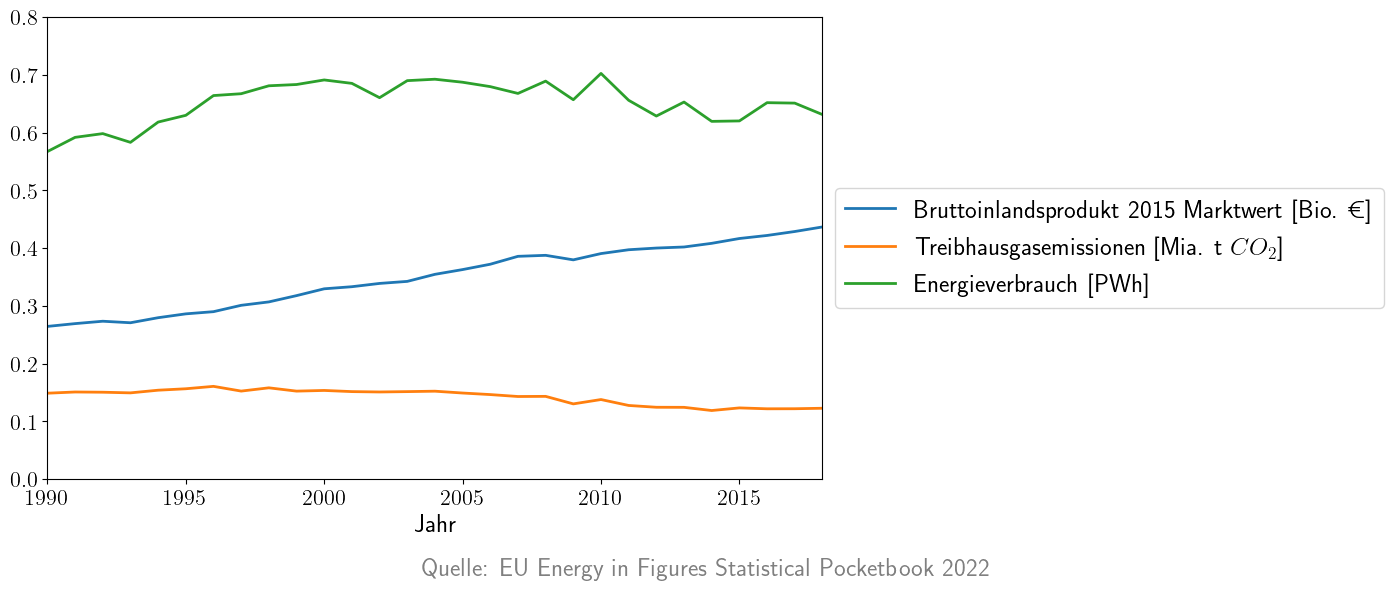

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# Daten einlesen aus Internetquelle
EUenergydata2020 = pd.read_excel('../data/energy-statistical-country-datasheets-2022-08-for-public-use.xlsx',sheet_name=2)
EUenergydata2020.columns = EUenergydata2020.iloc[6] # Jahreszahlen als Spaltentitel
EUenergydata2020GDP2015 = EUenergydata2020.iloc[540,3:] # Bruttoinlandsprodukt
EUenergydata2020GHG = EUenergydata2020.iloc[495,3:] # Treibhausgase
EUenergydata2020Mtoe = EUenergydata2020.iloc[403,3:] # Energieverbrauch
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(1e-3*EUenergydata2020GDP2015,label='Bruttoinlandsprodukt 2015 Marktwert [Bio. €]')
ax.plot(1e-3*EUenergydata2020GHG,label='Treibhausgasemissionen [Mia. t $CO_2$]')
ax.plot(0.011630*EUenergydata2020Mtoe,label='Energieverbrauch [PWh]')
#ax.title('Motivation Klimaschutz: weniger $CO_2$!')
fig.text(.5,-0.05,'Quelle: EU Energy in Figures Statistical Pocketbook 2022',color='gray')
ax.axis([1990,2018,0,0.8])
box = ax.get_position() # um Legende außerhalb zu machen, einige Tricks
ax.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.xlabel('Jahr');

:::{figure-md} eu-effekte
<img src="../img/eu-effekte.png" width="70%">

EU-Effekte
:::

{cite:p}``marie_rousselot_energy_2018`` [](#cite-marie_rousselot_energy_2018) zeigt auf:
- 2016 konsumieren Gebäude 41% oder 458 Mtoe der europäischen Endenergie (EU-28)
- Zwei Drittel davon sind für Wohngebäude
- marginale Änderungsraten zwischen -0,6%/Jahr und +0,7%/Jahr, seit 2008 stetig fallend (mehr Haushalte, mehr Ein-Personen-Haushalte, mehr Geräte in größeren Haushalten konterkariert Energieeffizienz-Bemühungen)
- durchschnittlich 200 kWh/m²
 - Dienstleistungsgebäude 300 kWh/m²
 - Wohngebäude 170 kWh/m²
 - In Spanien 25% weniger als der EU Durchschnitt
 - In Schweden 5% mehr als der EU Durchschnitt
- Haushalte verbesserten sich seit 2000 um durchschnittlich 28% (effizientere Heizungen und Gebäude)

:::{admonition} **AUFGABE**
Ermitteln Sie, mit dem <a href="http://www.indicators.odyssee-mure.eu/decomposition.html">Werkzeug von Odyssee</a>, welche Effekte sich positiv und negativ auf die Energieeffizienz von Großgeräten auswirken.
:::

*Antwort:...*

:::{tip}
Das europäische Projekt [Odyssee-Mure](https://www.odyssee-mure.eu/) erstellt eine Datenbank mit politischen Energieeffizienz-Maßnahmen in Europa und bietet aktuelle Webinare an, die Energieeffizienz-Indikatoren präsentieren.
:::

## Label sind international unterschiedlich

Produkte für Labels zu qualifizieren kostet aufgrund der nötigen Tests Geld. Die verschiedenen Wirtschaftsräume haben Interesse daran, ihre eigenen Unternehmen zu schützen. Ein gerne (nicht nur im Bereich Energieeffizienz) praktiziertes Verfahren besteht darin, die Vorschriften etwas anders zu gestalten, so dass erneuter Testaufwand entsteht und somit eine Markteintrittsbarriere wirksam wird.

Gleichzeitig gibt es natürlich klimatische und kulturelle Unterschiede zwischen den Wirtschaftsräumen, weshalb es durchaus auch manchmal sehr wichtig ist, Unterschiede zu machen, um unterschiedlichen Anforderungen gerecht zu werden.

Einige internationale Label-Standards sind im Folgenden gelistet, ohne Anspruch auf Vollständigkeit und Aktualität. Sie können den Startpunkt für weitere Recherchen bilden.

| **Wirtschaftsraum** | **Label/Organisation** |
|---|---|
| Australien | [Energy Rating](https://www.energyrating.gov.au/) |
| China | [China Energy Label (CEL)](https://certrip.org/cel/) |
| Indien | [Star Labeling Programme](https://beeindia.gov.in/news-events/hon%E2%80%99ble-mos-ic-power-new-and-renewable-energy-and-mos-skill-development-entrepreneursh-0) |
| Kanada | [Energy Star Canada](https://www.nrcan.gc.ca/energy-efficiency/energy-star-canada/energy-star-products/12519) |
| Korea | [Energy Efficiency Labeling, e-Standby Power](https://dco.energy.or.kr/renew_eng/energy/appliances/labeling.aspx) |

:::{admonition} **AUFGABE**
Finden Sie für das Gerät in Ihrem Projekt ein anderes, internationales Label und vergleichen Sie die Forderungen dieses Labels mit denjenigen des europäischen Labels. In welchen Punkten ist es strenger? In welchen Punkten ist es einfacher zu erfüllen? Woher könnten die Unterschiede rühren? Welches Label ist aus ökologischer Sicht das Bessere?
:::

*Antwort:...*

## Energieeffizienz alleine reicht nicht mehr: Green Deal

Roadmap "New Circular Action Plan" (CEAP) as a pillar of the **European Green Deal**

:::{figure-md} ebenen-zw
<img src="../img/ebenen-zirkulaerewertschoepfung-nach-sru.svg" width="70%">

Grafik adaptiert nach dem Empfehlungen des Sachverständigenrats für Umweltfragen
:::

Grafik adaptiert nach den Empfehlungen des deutschen Sachverständigenrats für Umweltfragen {cite:p}``kristine_sperlich_open_2020``

## Politik im Kleinen: Umsetzung von Energieeffizienz in Unternehmen und Organisationen

### Silodenken vermeiden

:::{figure-md} abteilungsstreit
<img src="../img/abteilungsstreit.png" width="70%">

Silodenken
:::

**Silodenken** ist ein altes Phänomen {cite:p}`trachsel_silodenken_2017`: dezentrale Strukturen (Abteilungen, Bereiche, Dezernate, der Name ist egal) in Organisationen können schneller reagieren als die Gesamtorganisation. Das ist sinnvoll, wenn es um die Anpassung an Marktbedingungen geht, weniger sinnvoll jedoch, wenn der interne Konkurrenzkampf um Budgets, Ansehen, etc. dominiert. Es ist weder bezogen auf Energieeffizienz noch bezogen auf andere Unternehmenskenndaten sinnvoll.

Im folgenden eine Übertragung der für Energieeffizienz relevanten Effekte von Silodenken aus {cite:p}`trachsel_silodenken_2017`:

| **Aspekte** | **starkes Silodenken** | **wenig Silodenken** |
|---|---|---|
| **strategisch** | bereichsweise Energieeffizienzgewinne maximieren, Kosten verschieben, Ressourcenkonflikte (Personal, Räume, Energiezugriff) | Energieeffizienzgewinne im Sinne der gesamten Organisation, Kosten ganzheitlich ansetzen, Ressourcen transparent und kooperativ zuteilen |
| **strukturell** | unzureichend zwischen Bereichen abstimmen, Informationen filtern und behindern, statische Organisationsformen (seit Jahrzehnten Zuständigkeiten gleich), Bereichswissen | Abstimmung zwischen Bereichen institutionalisieren, Informationen fließen, dynamische Organisationsformen mit Netzwerken, kontinuierliche Verbesserung (z. B. vorgesehen in ISO 50001 Energiemanagement), aktives Wissensmanagement |
| **kulturell** | Herangehensweise bereichsspezifisch, strenge Hierarchien (teilweise Kommunikation nur über Vorgesetzte - Flüsterpost verliert Informationen), Geheimhaltung, Bereichsdenken stärker als Organisationsdenken | gemeinsam Probleme lösen, am Team orientieren, offen kommunizieren, Organisationserfolg wichtiger als Bereichserfolg |

### Datenschutz beachten

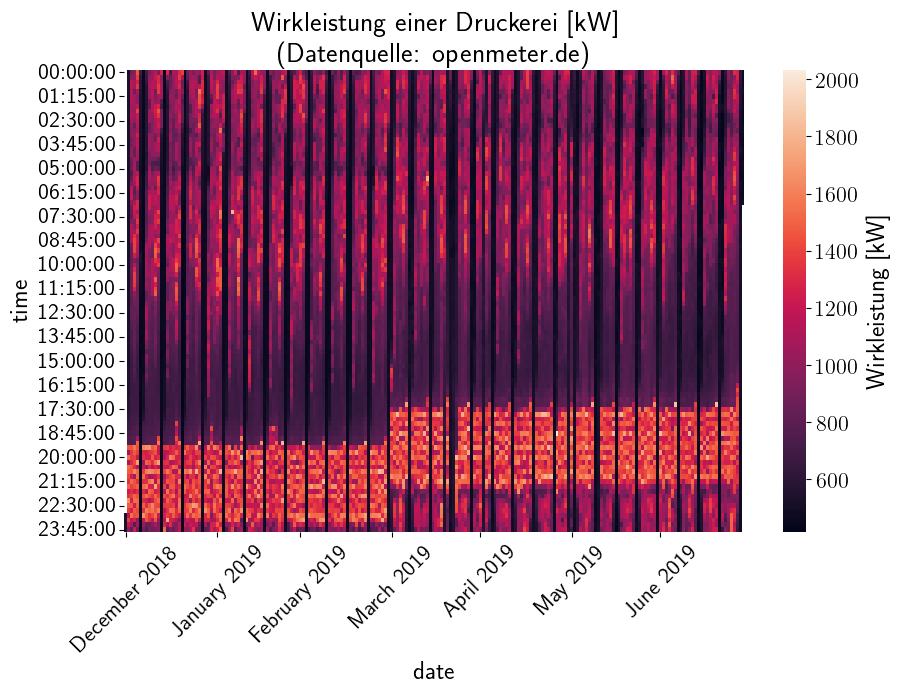

In [5]:
printer_corp = pd.read_csv('../data/661c7796-0170-4382-a299-4670bda82fdc.csv', header=0, names=['Zeit', 'kW'], parse_dates = ['Zeit'])
printer_corp=printer_corp.set_index('Zeit')
hm_df = pd.DataFrame({'kW': printer_corp['kW']})
hm_df['date'] = printer_corp.index.date
hm_df['time'] = printer_corp.index.time
hm_piv = hm_df.pivot(index = 'time', columns = 'date', values = 'kW')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(hm_piv, cbar_kws={'label':'Wirkleistung [kW]'})
ax.set_title('Wirkleistung einer Druckerei [kW] \n(Datenquelle: openmeter.de)');
set_date_ticks(ax, hm_piv.columns[0], hm_piv.columns[-1] ,axis='x', freq='1ME', date_format='%B %Y')
ax.tick_params(axis="x", rotation=45);

Was war in der Woche vom 24.02.2019? Warum begann die Abendschicht früher?
- Lastprofile geben Auskunft über Maschinenzeiten und damit über Arbeitszeiten - findige Chefs könnten das nutzen, um zu spionieren, Kündigungsgründe zu suchen ... 
- Wettbewerber könnten bei öffentlich verfügbaren Daten herauslesen, wie gut die Maschinen laufen und daraus Schlüsse ziehen z. B. über den Wartungszustand
- Diebstahlbanden könnten daraus Abwesenheitszeiten ableiten und entsprechend ihre Einbrüche planen
- etc.

Um solche unerwünschten Effekte bei Smart Metern zu verringern, schlägt {cite:p}`muller_gewinnung_2010` vor, die zeitliche Auflösung zu reduzieren, Zwischenwerte zu aggreggieren (Energiemengen summieren über mehrere Zeiträume, Intervalle mit Preisgleichheit, über mehrere Haushalte/Verbraucher) oder Daten zu anonymisieren. Für Energieeffizienzanalysen sind diese Maßnahmen in der Regel nicht sehr sinnvoll, da die verloren gehenden Informationen auch für die Energieeffizienzanalyse nicht mehr zur Verfügung stehen. Es ist jedoch sinnvoll, z. B. darauf zu achten, dass die Datenerfassung unabhängig von Schichtplänen und anderen personenbezogenen Daten stattfindet. So kann zumindest nicht automatisiert auf die zuständigen Personen rückgeschlossen werden.

### Energieeffiziente Beschaffung

Öffentliche Organisationen (zu denen auch Hochschulen gehören) können aufgrund ihrer Marktmacht bei der Beschaffung energieeffiziente Produkte fördern: {cite:p}`hepperle_nachhaltigkeit_2016` nennt als Beispiel, dass in den USA in den 1990er Jahren nur noch Computer mit "Energy Star" Energieeffizienzkennzeichnung gekauft werden durften. Daraufhin stellten die Hersteller diejenigen Produktionslinien ein, die ohne das Label produziert haben.

Als weiteres Beispiel hat die japanische Regierung 1999 vorgegeben, Computer, Autos, Klimaanlagen, etc. nur noch aus den energieeffizientesten Geräten ("Top Runners") auszuwählen {cite:p}`hepperle_nachhaltigkeit_2016`.

Ein weiterer Ansatz ist das Contracting energieeffizienter Alternativen: Der Contractor beschafft dabei energieeffiziente Geräte und erhält monetären Anteil an den Ersparnissen (bzw. trägt somit auch das Risiko) {cite:p}`hepperle_nachhaltigkeit_2016`. Diese Art von Contracting ist insbesondere für größere Anlagen der Energieerzeugung verbreitet, jedoch weniger für Geräte wie Computer.

:::{bibliography}
:filter: docname in docnames
:::